# A case study in linear regression
Now that we have the preliminaries out of the way, we're ready to dive in and do some machine learning using scikit-learn. In this notebook, I'll provide a basic overview of some core concepts in machine learning, and then, as a case study, we'll take a look at one particular application of machine learning that you're probably already familiar with, but may not have previously thought of as machine learning: linear regression.

Our first step is to import all of the core tools we're going to use repeatedly throughout this tutorial. This is conventional in Python; the idea is that consolidating all of the imports at the top helps us organize and keep track of all the external libraries and tools we're using. For pedagogical , I'll defer importing specific scikit-learn functionality until the point at which it's actually introduced. That way it'll be clear exactly where everything is coming from.

In [87]:
# the workhorse numerical computing package in Python
import numpy as np

# we've already encountered this specimen
import pandas as pd

# matplotlib is Python's main plotting library.
# the plt module provides high-level access to plots.
import matplotlib.pyplot as plt

plt.style.use('bmh')

# this is our data retrieval helper from the first notebook
from support import get_features

Additionally, let's also import the personality data we described in the first notebook.

In [69]:
data = pd.read_csv('data/Johnson-2014-IPIP-300.tsv.gz', sep='\t', )

## What *is* machine learning?
We're about a quarter of the way into the second notebook of our machine learning tutorial, and we still haven't even defined machine learning! This is probably a good time to do that. Here's a working definition: **machine learning is the field of science/engineering that seeks to build systems capable of learning from experience.**

This is a very broad definition, and in practice, the set of activities that get labeled "machine learning" is pretty heterogeneous. However, two elements are common to nearly all machine learning applications: (a) the emphasis is on developing algorithms that can learn (semi-)autonomously from data, rather than static rule-based systems that must be explicitly designed or updated by humans; and (b) algorithm evaluation focuses heavily on the ability to meet objective quantitative targets.

## Supervised learning
Machine learning techniques come in two general flavors: *supervised learning* and *unsupervised learning*. Learning is supervised whenever we know the true values that our model is trying to predict, and hence, are in a position to "supervise" the learning process by quantifying prediction accuracy and making iterative adjustments.

Some examples of supervised learning problems:

* Determining whether or not incoming email is spam
* Predicting a person's age from personality scores
* Diagnosing schizophrenia based on genetic markers

Within the class of supervised learning problems, we can draw a further distinction between *classification* problems and *regression* problems. In both cases, the goal is to develop a predictive model that recovers the true labels as accurately as possible. The difference between the two lies in the nature of the labels: in classification, the labels are discrete; in regression, they're continuous.

### Regression
Let's take the regression first case. A good example of regression, in the machine learning context, is... well, conventional linear regression. "Ordinary" least-squares regression is an example of supervised learning, because our model takes as its input both a vector of features (conventionally labeled `X`) and a vector of labels (`y`). We often use different terminology in ther social and biomedical sciences—calling `X` our set of variables or predictors, and `y` our outcome or dependent variable—but the idea is the same.

As a running regression example we'll return to throughout this tutorial, let's take up the problem of predicting age from personality data. This is a regression problem, because age varies continuously. What we're trying to find is some optimal function that, given a matrix of personality scores, can produce a set of continuous values that best approximates (for whatever definition of "best" we like) the true ages of our participants.

Visualizing this problem is a bit of a challenge, because our dataset has hundreds of potential predictive features, and human beings are not so good at visualizing data in hundreds of dimensions. So for illustrative purposes, let's pretend we have only one available predictor: Conscientiousness score. Then our problem reduces to asking: *how can we make optimal use of conscientiousness score to predict people's age?*

If we restrict ourselves for the moment to OLS regression, here's the answer:

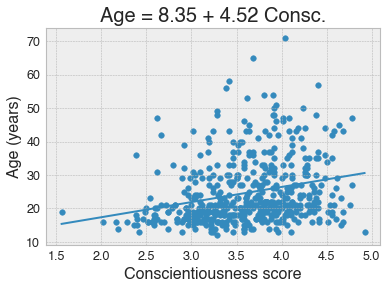

In [88]:
# subsample just 500 data points for visual clarity
x, y = get_features(data, 'Conscientiousness', 'AGE', n=500)

# scatter plot
plt.scatter(x, y)
plt.xlabel("Conscientiousness score", fontsize=16);
plt.ylabel("Age (years)", fontsize=16)

# linear regression using numpy's least-squares solver;
# we won't use this approach past this point
X = np.c_[np.ones(len(x)), x]
coefs = np.linalg.lstsq(X, y, rcond=None)[0]

# generate the regression line
x_range = np.linspace(x.min(), x.max())
y_pred = coefs[0] + coefs[1] * x_range
plt.title("Age = {:.2f} + {:.2f} Consc.".format(coefs[0], coefs[1]), fontsize=20)

# plot regression line
plt.plot(x_range, y_pred);

### Classification
Now let's look at classification. In this case, the target labels we're trying to predict are discrete (or categorical). For example, building a model that takes a structural brain image as input and outputs a prediction about whether the brain belongs to a dog or a cat is a classification problem, because the output is discrete: each brain belongs to one of the two classes (or categories), and no brain ever takes on an an intermediate value (though our classifiers can certainly make a graded or probabilistic prediction about which class a brain belongs to).

In practice, we can often turn regression problems into classification problems by discretizing the data in some way. To make the point really clear, let's stick with our personality dataset. Notice that instead of trying to predict continuous age from personality (a regression problem), we *could* in principle bin people into groups based on their age, and then try to develop a model that can correctly *classify* people as "young" or "old" based on their self-reported personality scores. Almost any regression problem can be turned into a classification problem in this way (the converse is not generally true).

I hasten to emphasize that discretizing continuous data for classification purposes is generally *not* a good thing to do (even though it's quite common in many social and biomedical sciences). But we'll allow ourselves the liberty in this particular case, because one thing the act of discretization does make clear is the close relationship between the two kinds of problems: conceptually, at least, most of what goes for regression also holds for classification, and vice versa.

Let's set up our age prediction problems as a classification problem by assigning all participants to either YOUNG (age < 21) or OLD (age >= 21) groups based on their age. I'm well aware that most people are not going to be very happy with a dichotomization of age that calls anyone over 21 an "old" person. If this bothers you (and it should), you now appreciate one of the problems (there are others!) with discretizing variables that are naturally continuous.

Since it's a bit easier to visualize discrete variables, let's plot the joint distribution of two personality traits that have a non-trivial relationship with age: Conscientiousness and Extraversion. We'll color the individual points based on the assigned age group.

The linear classification problem (which we won't try to solve just yet) is to identify a line through the data that maximally separates the two classes (i.e., YOUNG and OLD).

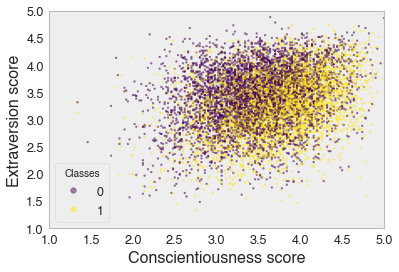

In [89]:
# To keep things efficient, let's subsample
sample = data.sample(10000, axis=0)

# Define age groups based on a cut-off of 21 years.
# Note: dichotomization of continuous variables is generally a bad idea in the real world!
sample['age_group'] = 0
sample.loc[sample['AGE'] > 21, 'age_group'] = 1

scatter = plt.scatter(sample['Conscientiousness'], sample['Extraversion'], c=sample['age_group'], s=3, alpha=0.5)
plt.xlabel('Conscientiousness score', fontsize=16)
plt.ylabel('Extraversion score', fontsize=16)
plt.xlim(1, 5)
plt.ylim(1, 5)
plt.grid(False)
plt.legend(*scatter.legend_elements(), loc="lower left", title="Classes");

## Unsupervised learning
Learning is unsupervised when there's no ground truth or right answer, and the goal is just to learn some useful structure from the data. The learning algorithm receives no direct guidance about how well it's performing.

For example, suppose someone hands us the following data, with no further explanation:

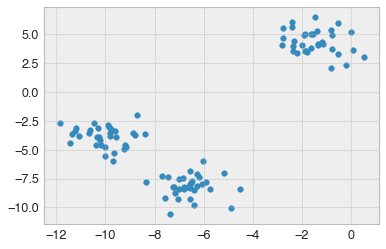

In [90]:
# scikit-learn has some handy utilities for generating structure data
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=1)
plt.scatter(*X.T);

It would be natural to think that these data are generated from three distinct *clusters*. But since the data are unlabeled, we don't know for a fact that this assignment is correct; we're inferring the grouping in an unsupervised way, based on whatever principle are built into our estimation method (e.g., our visual system's tendency to group objects together based on proximity). The lack of access to the ground truth—and often, it's not even clear that there *is* any ground truth—underscores the difficulty of the unsupervised learning challenge.

## The scikit-learn interface
Having described the major classes of learning problems we commonly face in machine learning, we can now turn to the scikit-learn package and explore the various ways it can help us tackle some of these problems.

### Estimators
Let's start our exploration with scikit-learn's `Estimator` object. In scikit-learn, an `Estimator` does exactly what the word *estimator* normally means in statistics: it implements ["a rule for calculating an estimate of a given quantity based on observed data"](https://en.wikipedia.org/wiki/Estimator).

While scikit-learn includes hundreds of different estimators that generate predictions in very different ways, they all share a common interface. In particular, they all implement `.fit()` and `.predict()` methods. When we call an estimator's `.fit()` method, we're telling it to take some training data—including both `X` and `y` values—and learn how to predict `y` from `X`. When we call `predict()`, we're asking the estimator to take some `X` rows (which could be either ones we've seen before, or entirely new ones) and predict corresponding `y` scores.

To see this in action, let's take a look at the implementation of "ordinary" least-squares regression in scikit-learn. We'll return to the same regression problem we introduced above: we want to predict people's age from their scores on the Big Five domains. In our earlier example, we used the least-squares solver found in numpy's linear algebra module. Now, we'll achieve the same result using scikit-learn's unified `Estimator` API.

First, let's set up our data, using the handy helper function we introduced earlier. Let's use the 5 Big Five domains as our predictive features. Age, as always, will be our outcome variable.

In [72]:
# Use our handy helper to get the X and y values.
# let's sample 1000 subjects from the full dataset
X, y = get_features(data, 'domains', 'AGE', n=1000)

The actual model fitting process in scikit-learn is remarkably straightforward; the steps are as follows:

1. Initialize the estimator object we want to use
2. Fit the estimator to some data

And here's the code:

In [78]:
# OLS (and many other variants of regression) is housed in the linear_model module
from sklearn.linear_model import LinearRegression

# Initialize the linear regression estimator. The default
# parameters work fine for our purposes.
est = LinearRegression()

# Fit the model
est.fit(X, y)

# Generate predictions
y_pred = est.predict(X)

That's it! Every single estimator in scikit-learn (and there are hundreds) will follow the same basic fit/predict pattern.

### Performance metrics
Once we've fit our model, it's natural to want to know how well it performs. At this point, if you're used to a point-and-click package like SPSS, or a stats-oriented language like R, you're probably expecting to see a big dump of information that includes things like regression coefficient estimates and standard errors, p-values, $R^2$ values, and so on. Well... you're not going to get those here. You *can* get those using other Python packages; for example StatsModels will give you [something very similar](https://www.statsmodels.org/dev/regression.html) to R's `lm` summary):

In [76]:
import statsmodels.formula.api as smf

model = smf.ols('AGE ~ Neuroticism + Extraversion + Openness + Agreeableness + Conscientiousness', data=data)
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    AGE   R-squared:                       0.116
Model:                            OLS   Adj. R-squared:                  0.116
Method:                 Least Squares   F-statistic:                     3827.
Date:                Tue, 30 Jul 2019   Prob (F-statistic):               0.00
Time:                        09:11:30   Log-Likelihood:            -5.2565e+05
No. Observations:              145388   AIC:                         1.051e+06
Df Residuals:                  145382   BIC:                         1.051e+06
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            16.7743      0.380     44.126      0.000      16.029      17.519
Neuroticism          -1.3833      0.045    -30.949      0.000      -1.471      -1.296
Extraversion         -4.2711      0.049    -86.944      0.000      -4.367      -4.175
Openness              1.3030      0.056     23.095      0.000       1.192       1.414
Agreeableness         1.7133      0.053     32.161      0.000       1.609       1.818
Conscientiousness     4.3250      0.050     86.181      0.000       4.227       4.423
==============================================================================
Omnibus:                    37988.404   Durbin-Watson:                   1.897
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            96632.634
Skew:                           1.431   Prob(JB):                         0.00
Kurtosis:                       5.785   Cond. No.                         125.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

As I said, you *can* do this kind of thing. But... that's not really what machine learning (or scikit-learn) is about. Instead, the focus is on prediction; typically, we have some objective quantitative metric we care about, and to the degree that a model can produce better values on that metric, we incline to evaluate it more favorably. This doesn't mean that we have to single-mindedly base our evaluation of model on just one quantity; in practice, many other considerations may come into play (e.g., computational efficiency, interpretability, etc.). The point is mainly that machine learning practitioners—at least in applied settings—tend to care much more than traditional scientists do about what models can actually *do*, and much less about what's going on inside them.

##### The coefficient of determination
For the rest of this tutorial, we're going to focus our attention on one particular metric of predictive performance: the coefficient of determination, or $R^2$. $R^2$ quantifies the proportion of variance in the outcome variable (e.g., age) explained by the fitted model:

$$R^2 = 1 - \frac{SS_{residual}}{SS_{total}}$$

$R^2$ is the most widely used measure of performance in the individual differences literature, and we'll stick with tradition here. But this shouldn't be taken as an indication that there's anything particularly special about $R^2$. In fact, in many applications, it's a pretty bad metric, because it's defined with reference to the relative variation in a particular sample, and completely ignores the absolute deviation of predictions from the true scores (i.e., a model can have an $R^2$ of 1 while generating a predicted score distribution entirely outside the range of the true scores). For our purposes though, $R^2$ is a sensible metric, because for most individual differences variables, absolute scores don't really mean anything anyway—we're almost always interested in how variation across individuals relates to variation in some other measure or construct.

##### Evaluating performance in scikit-learn
Let's see how well the linear regression model we fitted earlier (using the 5 Big Five domains as predictors) explains the variance in age. We'll make use of scikit-learn's `metrics` module, which contains a large number of predefined performance metrics. As is true of `Estimator` objects, all metrics in scikit-learn follow the same usage pattern: we pass in the true scores and the model's predicted scores, respectively.

In [84]:
# the metrics module contains predefined scoring functions
# for commonly used metrics like r^2, MSE, etc. but you
# can use any function you like as long as it has the
# signature used in the r2_score call below
from sklearn.metrics import 

# scoring functions are called by passing an array of
# true scores and and an array of predicted scores as
# inputs
r2_score(y, y_pred)

0.15368755446808535

We can explain about 15% of the variance in age using people's Big Five scores. (You can try experimenting with other metrics by replacing `r2_score` with `mean_squared_error`, `mean_absolute_error`, or one of the other predefined metrics. You could even write your own metric function and use it above, as long as it takes the true scores and predicted scores as the sole arguments.)

### Job well done?
At this point we have a fully operational machine learning workflow: we've specified our linear regression estimator, fitted it to some data, used it to generate predictions, and scored those predictions to get an estimate of performance. And we did it all in about 6 lines of code! We could, if we were so inclined, stop here, pat ourselves on the back for a job well done, and head home for the day.

For reasons that will shortly become clear, though, calling it quits here would be a bad idea. Instead, let's dig a little deeper. We'll start by asking an important question that echoes back to the definition of machine learning as the study of systems that can improve their output by learning from experience. Specifically: how does our model's performance evolve as we give it more data? Intuitively, we might expect that our $R^2$ will go up as we increase the size of our dataset (because having more data to learn from seems like it should be a good thing). But we should probably verify that.

Instead of fitting our `LinearRegression` estimator to just one dataset, let's systematically vary our sample size over a large range, and fit a linear regression to each one (actually, to stabilize our performance estimates, we'll average over multiple permutations at each sample size).

The code below is much more involved than it needs to be; as we'll see in the next section, scikit-learn includes a number of utilities that can achieve the same goal much more compactly and efficiently. But I think it can be helpful to explicitly lay out all of the steps we're going through before we replace them with a single line of black magic.

In [85]:
# initialize the OLS estimator
est = LinearRegression()

# we'll plot a separate panel for each feature set
feature_sets = ['domains', 'facets', 'items']

# evaluate performance at each of these sample sizes
sample_sizes = [100, 200, 500, 1000, 2000, 5000, 10000, 20000, 50000]

# number of permutations to average over at each sample size
n_reps = 10

# store results for all permutations, sample sizes, and feature sets
results = np.zeros((n_reps, len(sample_sizes), len(feature_sets)))

# loop over permutations
for i in range(n_reps):
    # loop over sample sizes
    for j, n in enumerate(sample_sizes):
        # get the appropriate features and labels
        *Xs, age = get_features(data, *feature_sets, 'AGE', n=n)
        # loop over feature sets
        for k, X in enumerate(Xs):
            # fit the model
            est.fit(X, age)
            # generate predictions
            pred_y = est.predict(X)
            # save R^2 in our results array
            results[i, j, k] = r2_score(age, pred_y)

# Compute means and stdevs for error bars 
r2_mean = results.mean(0)
r2_std = results.std(0)

Now we can plot the resulting $R^2$ values for each feature set as a function of sample size:

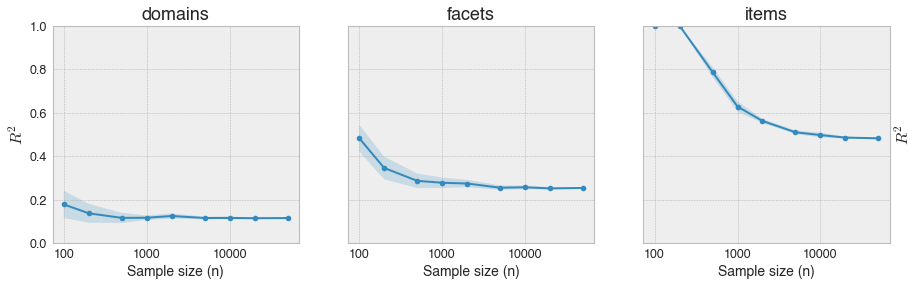

In [91]:
# used to display axis tick labels on a linear scale
from matplotlib.ticker import ScalarFormatter

# Set up plots=
fig, axes = plt.subplots(1, 3, figsize=(15, 4), sharey=True)
plt.ylim(0, 1)

# Plot results
for i, label in enumerate(feature_sets):
    mean, sd = r2_mean[:, i], r2_std[:, i]
    ax = axes[i]
    line = ax.plot(sample_sizes, mean, 'o-')
    ax.set_xscale('log')
    ax.xaxis.set_major_formatter(ScalarFormatter())
    ax.set_xlabel("Sample size (n)", fontsize=14)
    ax.fill_between(sample_sizes, mean-sd, mean+sd, alpha=0.2)
    ax.set_title(label, fontsize=18)

# Add y-axis labels on both sides
axes[0].set_ylabel("$R^2$", fontsize=16);
axes[-1].set_ylabel('$R^2$', fontsize=16)
axes[-1].yaxis.set_label_position("right")

Strangely, it looks like model performance *decreases* with increasing sample size! You may find this odd, seeing as everyone's always talking about the wonders of Big Data, and intuitively, you might think that having more information available would lead the model to make *better* predictions.

Actually, the model probably *is* making better predictions when it has more data to learn form. It just doesn't look that way. The problem is not what's happening on the right side of the curve, but what's happening on the left side (i.e., when sample size is small). On the left, the model is *overfitting* the data. Because there are very few data points, and our model is extremely flexible (it has 300 degrees of freedom with which to predict only a few hundred points!), there's nothing to stop the model from learning noise rather than signal. As the sample size grows, the data provide a natural buffer against this kind of thing. We'll explore this idea in much more detail in the next couple of sections.